In [1]:
# import libraries 

from bs4 import BeautifulSoup
import requests
import time
import datetime

import smtplib

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.
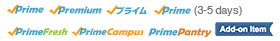
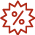

In [2]:
URL = 'https://www.amazon.in/DUDEME-Programmer-Coding-Developer-T-Shirt/dp/B08SFHKHV3/ref=sr_1_1?crid=2YSFONFJV53DX&keywords=data%2Banalyst%2Btshirts&qid=1661277713&sprefix=data%2Banalyst%2Btshirts%2Caps%2C252&sr=8-1'

headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36"}

page = requests.get(URL, headers=headers)

soup1 = BeautifulSoup(page.content, "html.parser")

print(soup1)






<!DOCTYPE html>

<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in">
<!-- sp:feature:head-start -->
<head>
<script>
   var aPageStart = (new Date()).getTime();
  </script>
<meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<script type="text/javascript">
   var ue_t0=ue_t0||+new Date();
  </script>
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<script type="text/javascript">
   window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.sli
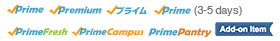
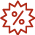

In [3]:
soup2 = BeautifulSoup(soup1.prettify(), "html.parser")

print(soup2)

In [4]:
title = soup2.find(id='title').get_text()
title = title.strip()

print(title)


DUDEME Data Nerd | Programmer T Shirt | Coding T Shirt for Coders | Developer T Shirt | Round Neck Cotton T-Shirt | Geek Half Sleeve T Shirt for Men & Women


In [5]:
price = float(soup2.find(id='corePrice_desktop').get_text().strip()[6:].strip()[:22].strip().replace('₹',''))

print(price)

499.0


In [6]:
import datetime

today = datetime.date.today()

print(today)

2022-08-24


In [7]:
import csv

header = ['Title','Price','Date']

data = [title,price,today]

with open('AmazonWebScaperDataset.csv','w', newline='', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerow(data)
    

In [8]:
import pandas as pd

df = pd.read_csv(r'C:\Users\DELL\AmazonWebScaperDataset.csv')

print(df)

                                               Title  Price        Date
0  DUDEME Data Nerd | Programmer T Shirt | Coding...  499.0  2022-08-24


In [9]:
with open('AmazonWebScaperDataset.csv','a+', newline='', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(data)
    

In [10]:
def check_price():
    URL = 'https://www.amazon.in/DUDEME-Programmer-Coding-Developer-T-Shirt/dp/B08SFHKHV3/ref=sr_1_1?crid=2YSFONFJV53DX&keywords=data%2Banalyst%2Btshirts&qid=1661277713&sprefix=data%2Banalyst%2Btshirts%2Caps%2C252&sr=8-1'

    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36"}

    page = requests.get(URL, headers=headers)

    soup1 = BeautifulSoup(page.content, "html.parser")
    
    soup2 = BeautifulSoup(soup1.prettify(), "html.parser")
    
    title = soup2.find(id='title').get_text()
    
    price = float(soup2.find(id='corePrice_desktop').get_text().strip()[6:].strip()[:22].strip().replace('₹',''))
    
    title = title.strip()
    
    import datetime

    today = datetime.date.today()
    
    header = ['Title', 'Price', 'Date']
    data = [title, price, today]

    with open('AmazonWebScraperDataset.csv', 'a+', newline='', encoding='UTF8') as f:
        writer = csv.writer(f)
        writer.writerow(data)
    
    
    
    
    

In [11]:
def send_mail():
    server = smtplib.SMTP_SSL('smtp.gmail.com',465)
    server.ehlo()
    #server.starttls()
    server.ehlo()
    server.login('Sharko.pal1289@gmail.com','xxxxxxxxxxxxxx')
    
    subject = "The Shirt you want is below $15! Now is your chance to buy!"
    body = "Alex, This is the moment we have been waiting for. Now is your chance to pick up the shirt of your dreams. Don't mess it up! Link here: https://www.amazon.in/DUDEME-Programmer-Coding-Developer-T-Shirt/dp/B08SFHKHV3/ref=sr_1_1?crid=2YSFONFJV53DX&keywords=data%2Banalyst%2Btshirts&qid=1661277713&sprefix=data%2Banalyst%2Btshirts%2Caps%2C252&sr=8-1"
   
    msg = f"Subject: {subject}\n\n{body}"
    
    server.sendmail(
        'Sharko.pal1289@gmail.com',
        msg
     
    )